In [ ]:
import cv2
import numpy as np
import os
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Dense,Flatten,Conv2D,Activation,Dropout
from keras import backend as K
import keras
from keras.models import Sequential, Model
from keras.models import load_model
from keras.optimizers import SGD
from keras.callbacks import EarlyStopping,ModelCheckpoint
from keras.layers import MaxPool2D
from google.colab.patches import cv2_imshow

In [ ]:
train_path="/content/drive/MyDrive/rice-leaf (1)/rice/train"
test_path="/content/drive/MyDrive/rice-leaf (1)/rice/validation"
class_names=os.listdir(train_path)
class_names_test=os.listdir(test_path)

In [ ]:
print(class_names)
print(class_names_test)

['blast', 'bacterial_leaf_blight', 'brownspot']
['brownspot', 'blast', 'bacterial_leaf_blight']


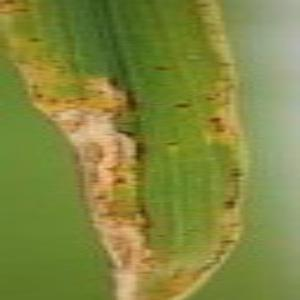

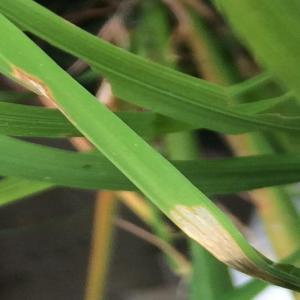

In [ ]:
image_blight=cv2.imread("/content/drive/MyDrive/rice-leaf (1)/rice/train/bacterial_leaf_blight/blight_rotated_044.jpg")
cv2_imshow(image_blight)
image_blast=cv2.imread("/content/drive/MyDrive/rice-leaf (1)/rice/train/blast/blast_rotated_025.jpg")
cv2_imshow(image_blast)

In [ ]:
train_datagen = ImageDataGenerator(zoom_range=0.15,width_shift_range=0.2,height_shift_range=0.2,shear_range=0.15)
test_datagen = ImageDataGenerator()

In [ ]:
train_generator = train_datagen.flow_from_directory("/content/drive/MyDrive/rice-leaf (1)/rice/train",target_size=(224, 224),batch_size=32,shuffle=True,class_mode='binary')
test_generator = test_datagen.flow_from_directory("/content/drive/MyDrive/rice-leaf (1)/rice/validation",target_size=(224,224),batch_size=32,shuffle=False,class_mode='binary')

Found 157 images belonging to 3 classes.
Found 84 images belonging to 3 classes.


In [ ]:
def VGG16():
    model = Sequential()
    model.add(Conv2D(input_shape=(224,224,3),filters=64,kernel_size=(3,3),padding="same", activation="relu"))
    model.add(Conv2D(filters=64,kernel_size=(3,3),padding="same", activation="relu"))
    model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
    model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
    model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
    model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
    model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
    model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
    model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
    model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
    model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
    model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
    model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
    model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
    model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
    model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
    model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
    model.add(MaxPool2D(pool_size=(2,2),strides=(2,2),name='vgg16'))
    model.add(Flatten(name='flatten'))
    model.add(Dense(256, activation='relu', name='fc1'))
    model.add(Dense(128, activation='relu', name='fc2'))
    model.add(Dense(1, activation='sigmoid', name='output'))
    return model
    


In [ ]:
model=VGG16()

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 224, 224, 64)      1792      
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 224, 224, 64)      36928     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 112, 112, 64)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 112, 112, 128)     73856     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 112, 112, 128)     147584    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 56, 56, 128)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 56, 56, 256)       2

In [ ]:
Vgg16 = Model(inputs=model.input, outputs=model.get_layer('vgg16').output)

In [ ]:
for layer in Vgg16.layers:
    layer.trainable = False

In [ ]:
for layer in model.layers:
    print(layer, layer.trainable)

<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7fbe3ffe37f0> False
<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7fbdeb4436d8> False
<tensorflow.python.keras.layers.pooling.MaxPooling2D object at 0x7fbdeb3f6c50> False
<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7fbdeb406f98> False
<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7fbdeb4066a0> False
<tensorflow.python.keras.layers.pooling.MaxPooling2D object at 0x7fbdeb412128> False
<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7fbdeb41a470> False
<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7fbdeb4128d0> False
<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7fbdeb41aac8> False
<tensorflow.python.keras.layers.pooling.MaxPooling2D object at 0x7fbdeb3a0fd0> False
<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7fbdeb3a59e8> False
<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x

In [ ]:
opt = SGD(lr=1e-4, momentum=0.9)
model.compile(loss="binary_crossentropy", optimizer=opt,metrics=["accuracy"])

In [ ]:
es=EarlyStopping(monitor='val_accuracy', mode='max', verbose=1, patience=20)

In [ ]:
mc = ModelCheckpoint('/content/gdrive/My Drive/best_model.h5', monitor='val_accuracy', mode='max', save_best_only=True)

In [ ]:
H = model.fit_generator(train_generator,validation_data=test_generator,epochs=10,verbose=1,callbacks=[mc])

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/10
5/5 [==============================] - 70s 15s/step - loss: 0.6867 - accuracy: 0.2121 - val_loss: 0.6530 - val_accuracy: 0.2857
Epoch 2/10
5/5 [==============================] - 69s 15s/step - loss: 0.2183 - accuracy: 0.1781 - val_loss: 0.7453 - val_accuracy: 0.2857
Epoch 3/10
5/5 [==============================] - 69s 15s/step - loss: -0.0188 - accuracy: 0.1696 - val_loss: 0.9074 - val_accuracy: 0.2857
Epoch 4/10
5/5 [==============================] - 69s 15s/step - loss: -0.2186 - accuracy: 0.1640 - val_loss: 1.0899 - val_accuracy: 0.2857
Epoch 5/10
5/5 [==============================] - 69s 15s/step - loss: -0.5034 - accuracy: 0.1653 - val_loss: 1.2960 - val_accuracy: 0.2857
Epoch 6/10
5/5 [==============================] - 69s 15s/step - loss: -0.2579 - accuracy: 0.1510 - val_loss: 1.4563 - val_accuracy: 0.2857
Epoch 7/10
5/5 [==============================] - 69s 15s/step - loss: -0.5000 - accuracy: 0.1462 - val_loss: 1.6306 - val_accuracy: 0.2857
Epoch 8/10
5/5 [======

In [ ]:
import matplotlib.pyplot as plt

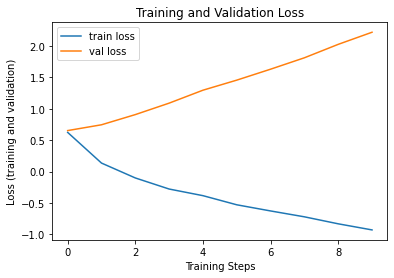

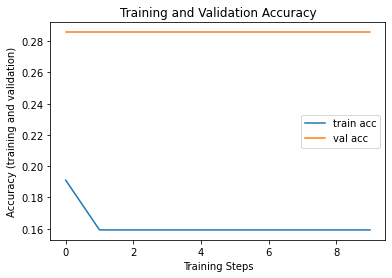

<Figure size 432x288 with 0 Axes>

In [ ]:
# plot the loss
plt.plot(H.history['loss'], label='train loss')
plt.plot(H.history['val_loss'], label='val loss')
plt.legend()
plt.title('Training and Validation Loss')
plt.ylabel("Loss (training and validation)")
plt.xlabel("Training Steps")
plt.show()
plt.savefig('LossVal_loss')


# plot the accuracy
plt.plot(H.history['accuracy'], label='train acc')
plt.plot(H.history['val_accuracy'], label='val acc')
plt.legend()
plt.title('Training and Validation Accuracy')
plt.ylabel("Accuracy (training and validation)")
plt.xlabel("Training Steps")
plt.show()
plt.savefig('AccVal_acc')


In [ ]:
model.evaluate_generator(test_generator)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/training.py:1877: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  warnings.warn('`Model.evaluate_generator` is deprecated and '


[2.2406136989593506, 0.2857142984867096]